In [2]:
# Imports

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter
import scipy.stats as stats
sns.color_palette()


import statsmodels.api as sm

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report




In [3]:
pd.options.display.float_format = "{:.2f}".format

In [3]:
%%sh
wc -l ../data/raw/UNR-IDD.csv

   37412 ../data/raw/UNR-IDD.csv


In [4]:
#import data as pd dataframe
rawdata_path = "../data/raw/UNR-IDD.csv"

raw_df = pd.read_csv(rawdata_path, index_col=None)

In [15]:
# save raw_df to folder
raw_df.to_csv("../data/raw/raw_df.csv", index=False)

In [12]:
raw_df.head()

,Switch ID,Port Number,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Packets Rx Dropped,Packets Tx Dropped,Packets Rx Errors,...,Unknown Load/Latest,Latest bytes counter,is_valid,Table ID,Active Flow Entries,Packets Looked Up,Packets Matched,Max Size,Label,Binary Label
0,of:000000000000000c,Port#:1,132,9181,6311853,238,46,0,0,0,...,0,0,True,0,9,767,688,-1,TCP-SYN,Attack
1,of:000000000000000c,Port#:2,187,6304498,15713,171,46,0,0,0,...,0,0,True,0,9,767,688,-1,TCP-SYN,Attack
2,of:000000000000000c,Port#:3,235,6311567,8030,58,46,0,0,0,...,0,0,True,0,9,767,688,-1,TCP-SYN,Attack
3,of:000000000000000c,Port#:4,59,7878,16439,182,46,0,0,0,...,0,0,True,0,9,767,688,-1,TCP-SYN,Attack
4,of:000000000000000a,Port#:1,188,6304547,16497,183,46,0,0,0,...,0,0,True,0,7,489,403,-1,TCP-SYN,Attack


In [16]:
# Numerical and categorical columns
num_cols = list(raw_df._get_numeric_data().columns)
categ_cols = [colum for colum in raw_df.columns if colum not in num_cols]  #easy way of getting the categorical column names
print("categorical",
categ_cols , "\n"
"numerical",
num_cols)

categorical ['Switch ID', 'Port Number', 'Label', 'Binary Label'] 
numerical ['Received Packets', 'Received Bytes', 'Sent Bytes', 'Sent Packets', 'Port alive Duration (S)', 'Packets Rx Dropped', 'Packets Tx Dropped', 'Packets Rx Errors', 'Packets Tx Errors', 'Delta Received Packets', 'Delta Received Bytes', 'Delta Sent Bytes', 'Delta Sent Packets', 'Delta Port alive Duration (S)', 'Delta Packets Rx Dropped', ' Delta Packets Tx Dropped', 'Delta Packets Rx Errors', 'Delta Packets Tx Errors', 'Connection Point', 'Total Load/Rate', 'Total Load/Latest', 'Unknown Load/Rate', 'Unknown Load/Latest', 'Latest bytes counter', 'is_valid', 'Table ID', 'Active Flow Entries', 'Packets Looked Up', 'Packets Matched', 'Max Size']


In [17]:
raw_df.columns

Index(['Switch ID', 'Port Number', 'Received Packets', 'Received Bytes',
       'Sent Bytes', 'Sent Packets', 'Port alive Duration (S)',
       'Packets Rx Dropped', 'Packets Tx Dropped', 'Packets Rx Errors',
       'Packets Tx Errors', 'Delta Received Packets', 'Delta Received Bytes',
       'Delta Sent Bytes', 'Delta Sent Packets',
       'Delta Port alive Duration (S)', 'Delta Packets Rx Dropped',
       ' Delta Packets Tx Dropped', 'Delta Packets Rx Errors',
       'Delta Packets Tx Errors', 'Connection Point', 'Total Load/Rate',
       'Total Load/Latest', 'Unknown Load/Rate', 'Unknown Load/Latest',
       'Latest bytes counter', 'is_valid', 'Table ID', 'Active Flow Entries',
       'Packets Looked Up', 'Packets Matched', 'Max Size', 'Label',
       'Binary Label'],
      dtype='object')

In [18]:
raw_df.shape

(37411, 34)

In [19]:
#### ***** DO NOT RUN **** ######

# create reduced dataset without columns that provide no information.
# dropping also switch  id and port id

reduced_df = raw_df[[#'Switch ID', 
                        #'Port Number', 
                        'Received Packets', 
                        'Received Bytes', 
                        'Sent Bytes', 
                        'Sent Packets', 
                        'Port alive Duration (S)',
                        #'Packets Rx Dropped', 
                        #'Packets Tx Dropped', 
                        #'Packets Rx Errors',
                        #'Packets Tx Errors', 
                        'Delta Received Packets', 
                        'Delta Received Bytes',
                        'Delta Sent Bytes', 
                        'Delta Sent Packets',
                        'Delta Port alive Duration (S)', 
                        #'Delta Packets Rx Dropped',
                        #' Delta Packets Tx Dropped', 
                        #'Delta Packets Rx Errors',
                        #'Delta Packets Tx Errors', 
                        'Connection Point', 
                        'Total Load/Rate',
                        'Total Load/Latest', 
                        'Unknown Load/Rate', 
                        'Unknown Load/Latest',
                        'Latest bytes counter', 
                        #'is_valid', 
                        #'Table ID', 
                        'Active Flow Entries',
                        'Packets Looked Up', 
                        'Packets Matched', 
                        #'Max Size', 
                        'Label',
                        'Binary Label']]

In [20]:
reduced_df.shape

(37411, 21)

In [21]:
corr2 = reduced_df.corr()
corr2.style.background_gradient(cmap='coolwarm')

,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Delta Received Packets,Delta Received Bytes,Delta Sent Bytes,Delta Sent Packets,Delta Port alive Duration (S),Connection Point,Total Load/Rate,Total Load/Latest,Unknown Load/Rate,Unknown Load/Latest,Latest bytes counter,Active Flow Entries,Packets Looked Up,Packets Matched
Received Packets,1.000000,0.235931,0.263276,0.585578,0.201716,0.178632,0.009830,0.000463,0.086540,-0.068982,0.143162,0.020503,0.033358,0.020503,0.033358,0.020503,-0.032871,0.737932,0.737933
Received Bytes,0.235931,1.000000,0.678341,0.393544,0.753177,-0.042367,0.098901,0.007656,-0.063304,-0.013239,0.112916,0.021954,0.005309,0.021954,0.005309,0.021954,-0.033760,0.378620,0.378530
Sent Bytes,0.263276,0.678341,1.000000,0.492114,0.744272,-0.072000,0.005275,0.087682,-0.039423,-0.025379,0.038600,0.030343,0.030538,0.030343,0.030538,0.030343,-0.032480,0.452300,0.452223
Sent Packets,0.585578,0.393544,0.492114,1.000000,0.291104,0.034219,0.011125,0.020418,0.103534,-0.094366,-0.037271,0.021972,0.025320,0.021972,0.025320,0.021972,-0.038064,0.936095,0.936094
Port alive Duration (S),0.201716,0.753177,0.744272,0.291104,1.000000,-0.124533,0.011960,0.008339,-0.118922,0.005844,0.161257,0.003296,-0.024441,0.003296,-0.024441,0.003296,-0.031836,0.287166,0.287050
Delta Received Packets,0.178632,-0.042367,-0.072000,0.034219,-0.124533,1.000000,0.098319,0.037238,0.600443,0.010933,-0.002523,-0.014579,-0.022130,-0.014579,-0.022130,-0.014579,-0.017069,0.044765,0.044780
Delta Received Bytes,0.009830,0.098901,0.005275,0.011125,0.011960,0.098319,1.000000,-0.070402,0.035802,0.004953,0.014501,0.008069,-0.001920,0.008069,-0.001920,0.008069,-0.008300,0.007832,0.007830
Delta Sent Bytes,0.000463,0.007656,0.087682,0.020418,0.008339,0.037238,-0.070402,1.000000,0.105281,-0.000359,-0.028580,0.266750,0.197357,0.266750,0.197357,0.266750,-0.007258,0.005916,0.005916
Delta Sent Packets,0.086540,-0.063304,-0.039423,0.103534,-0.118922,0.600443,0.035802,0.105281,1.000000,0.007505,-0.032092,-0.011551,-0.019009,-0.011551,-0.019009,-0.011551,-0.016079,0.041024,0.041039
Delta Port alive Duration (S),-0.068982,-0.013239,-0.025379,-0.094366,0.005844,0.010933,0.004953,-0.000359,0.007505,1.000000,0.000686,-0.002853,-0.007732,-0.002853,-0.007732,-0.002853,-0.050385,-0.093856,-0.093863


In [61]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

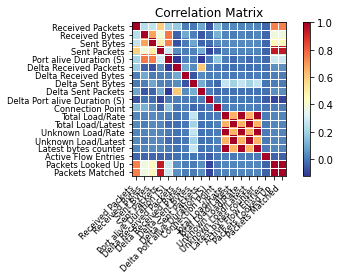

In [22]:
sm.graphics.plot_corr(corr2, xnames=list(corr2.columns))

plt.rc("figure", figsize=(16, 18))
plt.show()

In [23]:
#### ***** DO NOT RUN **** ######
# save reduced dataset

reduced_df.to_csv("../data/processed/reduced_df.csv", index=False)

In [38]:
#### ***** DO NOT RUN **** ######
# create the labels for binary labels and label

labels_binlab = raw_df["Binary Label"]
labels_labcat = raw_df["Label"]

labels_binlab.head(), labels_binlab.shape, labels_labcat.head(), labels_labcat.shape

(0    Attack
 1    Attack
 2    Attack
 3    Attack
 4    Attack
 Name: Binary Label, dtype: object,
 (37411,),
 0    TCP-SYN
 1    TCP-SYN
 2    TCP-SYN
 3    TCP-SYN
 4    TCP-SYN
 Name: Label, dtype: object,
 (37411,))

In [39]:
####    DO NOT RUN ######
# encode the labels with values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

labels_binlab = labels_binlab.replace(to_replace= ["Attack", "Normal"], value= [1 , 0])
labels_labcat = labels_labcat.replace(to_replace= ['Blackhole', 'Diversion', 'Normal', 'Overflow', 'PortScan', 'TCP-SYN'], value= [1 , 2, 3, 4, 5, 0])

labels_binlab.unique(), labels_labcat.unique()

(array([1, 0]), array([0, 1, 2, 4, 3, 5]))

In [26]:
#another way of doing the encoding of labels, but this selects the values not in the order we want
ylab = le.fit_transform(labels_binlab)
ycat = le.fit_transform(labels_labcat)

ylab[:20] , ycat[:20]

(array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
 array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]))

In [34]:
# just checking the correlations between most features and labels now in numeric form

Aa = pd.read_csv("../data/processed/labels_binlab.csv")
Bb = pd.read_csv("../data/processed/reduced_df.csv")
Bb["newcol"] = Aa["Binary Label"]
Dd = pd.read_csv("../data/processed/labels_labcat.csv")
Bb["newLabel"] = Dd["Label"]

corr3 = Bb.corr()
corr3.style.background_gradient(cmap='coolwarm')

,Unnamed: 0,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Delta Received Packets,Delta Received Bytes,Delta Sent Bytes,Delta Sent Packets,Delta Port alive Duration (S),Connection Point,Total Load/Rate,Total Load/Latest,Unknown Load/Rate,Unknown Load/Latest,Latest bytes counter,Active Flow Entries,Packets Looked Up,Packets Matched,newcol,newLabel
Unnamed: 0,1.000000,0.253306,0.090429,0.103081,0.273438,-0.004291,0.199635,0.038525,0.031630,0.188811,-0.024599,0.015036,-0.063190,-0.126775,-0.063190,-0.126775,-0.063190,0.025207,0.320754,0.320747,-0.226972,-0.042365
Received Packets,0.253306,1.000000,0.235931,0.263276,0.585578,0.201716,0.178632,0.009830,0.000463,0.086540,-0.068982,0.143162,0.020503,0.033358,0.020503,0.033358,0.020503,-0.032871,0.737932,0.737933,-0.680680,-0.043091
Received Bytes,0.090429,0.235931,1.000000,0.678341,0.393544,0.753177,-0.042367,0.098901,0.007656,-0.063304,-0.013239,0.112916,0.021954,0.005309,0.021954,0.005309,0.021954,-0.033760,0.378620,0.378530,-0.394573,-0.450800
Sent Bytes,0.103081,0.263276,0.678341,1.000000,0.492114,0.744272,-0.072000,0.005275,0.087682,-0.039423,-0.025379,0.038600,0.030343,0.030538,0.030343,0.030538,0.030343,-0.032480,0.452300,0.452223,-0.473247,-0.435915
Sent Packets,0.273438,0.585578,0.393544,0.492114,1.000000,0.291104,0.034219,0.011125,0.020418,0.103534,-0.094366,-0.037271,0.021972,0.025320,0.021972,0.025320,0.021972,-0.038064,0.936095,0.936094,-0.919435,-0.083516
Port alive Duration (S),-0.004291,0.201716,0.753177,0.744272,0.291104,1.000000,-0.124533,0.011960,0.008339,-0.118922,0.005844,0.161257,0.003296,-0.024441,0.003296,-0.024441,0.003296,-0.031836,0.287166,0.287050,-0.331775,-0.730576
Delta Received Packets,0.199635,0.178632,-0.042367,-0.072000,0.034219,-0.124533,1.000000,0.098319,0.037238,0.600443,0.010933,-0.002523,-0.014579,-0.022130,-0.014579,-0.022130,-0.014579,-0.017069,0.044765,0.044780,0.054783,0.115038
Delta Received Bytes,0.038525,0.009830,0.098901,0.005275,0.011125,0.011960,0.098319,1.000000,-0.070402,0.035802,0.004953,0.014501,0.008069,-0.001920,0.008069,-0.001920,0.008069,-0.008300,0.007832,0.007830,0.002918,-0.023256
Delta Sent Bytes,0.031630,0.000463,0.007656,0.087682,0.020418,0.008339,0.037238,-0.070402,1.000000,0.105281,-0.000359,-0.028580,0.266750,0.197357,0.266750,0.197357,0.266750,-0.007258,0.005916,0.005916,0.001930,-0.020413
Delta Sent Packets,0.188811,0.086540,-0.063304,-0.039423,0.103534,-0.118922,0.600443,0.035802,0.105281,1.000000,0.007505,-0.032092,-0.011551,-0.019009,-0.011551,-0.019009,-0.011551,-0.016079,0.041024,0.041039,0.052226,0.109928


In [37]:
#to get a picture of the correlation graph
foto1 = corr3.style.background_gradient(cmap='coolwarm')

In [39]:
#convert it to an html file and then into a jpeg
foto1.to_html("foto1.html")

In [27]:
#### ***** DO NOT RUN **** ######
# drop the label columns creating the reduced features dataframe
r_features = reduced_df.drop(['Label', "Binary Label"], axis=1)

r_features.shape


(37411, 19)

In [41]:
#a picture with only the remaining features
corr4 = r_features.corr()
pict4 = corr4.style.background_gradient(cmap= "coolwarm")
pict4.to_html("pict4.html")


In [40]:
#### ***** DO NOT RUN **** ######
# save all new dataframes

r_features.to_csv("../data/processed/r_features.csv", index=False)
labels_binlab.to_csv("../data/processed/labels_binlab.csv", index=False)
labels_labcat.to_csv("../data/processed/labels_labcat.csv", index=False)

# the labels include a column with the origina order...

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [29]:
#### ***** DO NOT RUN **** ######
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(r_features,labels_binlab, random_state= 0 , test_size= 0.2)

# save the test and train sets
sets = [X_train_bin, X_test_bin, y_train_bin, y_test_bin]
names = list(str("X_train_bin,X_test_bin,y_train_bin,y_test_bin").split(','))
for idx in range(len(sets)):
    sets[idx].to_csv("../data/processed/" + names[idx] + ".csv", index=False)

In [30]:
#### ***** DO NOT RUN **** ######
# do the same process but using labcat (cat) labels.
#labels_labcat = pd.read_csv("../data/processed/labels_labcat.csv")
#r_features = pd.read_csv("../data/processed/r_features.csv")

X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(r_features,labels_labcat, random_state= 0 , test_size= 0.2)

# save the test and train sets
sets = [X_train_cat, X_test_cat, y_train_cat, y_test_cat]
names = list(str("X_train_cat,X_test_cat,y_train_cat,y_test_cat").split(','))
for idx in range(len(sets)):
    sets[idx].to_csv("../data/processed/" + names[idx] + ".csv", index=False)



In [31]:
print(y_train_bin.value_counts()), print(y_test_bin.value_counts())

1    26925
0     3003
Name: Binary Label, dtype: int64
1    6713
0     770
Name: Binary Label, dtype: int64


(None, None)

In [32]:
# build a pipeline that standarizes the data and apply logistic regression

lgr_pipeline = Pipeline(steps = [("numeric", StandardScaler() ), 
        ("logistic_regression", LogisticRegression(class_weight= "balanced", random_state= 0))])

In [33]:
# run the pipeline with labes for attach no attack

lgr_pipeline.fit(X_train_bin, y_train_bin)
y_pred_bin = lgr_pipeline.predict(X_test_bin)
print(classification_report(y_test_bin, y_pred_bin))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       770
           1       1.00      1.00      1.00      6713

    accuracy                           1.00      7483
   macro avg       1.00      1.00      1.00      7483
weighted avg       1.00      1.00      1.00      7483



In [36]:
# do the same process but using labcat (cat) labels.
lgr_pipeline_c = Pipeline(steps = [("numeric", StandardScaler() ), 
        ("logistic_regression", LogisticRegression(class_weight= "balanced", random_state= 0))])

lgr_pipeline_c.fit(X_train_cat, y_train_cat)
y_pred_cat = lgr_pipeline_c.predict(X_test_cat)
print(classification_report(y_test_cat, y_pred_cat))

              precision    recall  f1-score   support

           1       0.81      0.62      0.70      1681
           2       0.65      0.69      0.67      1111
           3       1.00      1.00      1.00       770
           4       0.18      0.64      0.28       202
           5       0.91      0.55      0.68      1911
           6       0.66      0.87      0.75      1808

    accuracy                           0.71      7483
   macro avg       0.70      0.73      0.68      7483
weighted avg       0.78      0.71      0.72      7483



/Users/joaquingianantonio/tensor_flow/env2/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# build a pipeline that DO NOT standarizes the data and apply logistic regression  Check the names of all variables

lgr_no_pipeline = Pipeline(steps = [ 
        ("logistic_regression", LogisticRegression(class_weight= "balanced", random_state= 0))])


lgr_no_pipeline.fit(X_train_cat, y_train_cat)
y_pred_cat = lgr_no_pipeline_c.predict(X_test_cat)
print(classification_report(y_test_cat, y_pred_cat)


In [67]:
!pip install TPOT

In [68]:
%%time
from sklearn.metrics import make_scorer


from tpot import TPOTClassifier
tpot = TPOTClassifier(generations=5, 
                      population_size=8,
                      scoring=None,
                      verbosity=2,
                      random_state=42)
tpot.fit(X_train_bin, y_train_bin)
print(f"Tpop score on test data: {tpot.score(X_test_bin, y_test_bin):.2f}")
tpot.export('tpot_network_analytics.py')

/Users/joaquingianantonio/tensor_flow/env2/lib/python3.8/site-packages/requests/__init__.py:109: RequestsDependencyWarning: urllib3 (1.26.11) or chardet (5.0.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn(


Optimization Progress:   0%|          | 0/48 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 1.0

Generation 2 - Current best internal CV score: 1.0

Generation 3 - Current best internal CV score: 1.0

Generation 4 - Current best internal CV score: 1.0

Generation 5 - Current best internal CV score: 1.0

Best pipeline: XGBClassifier(input_matrix, learning_rate=0.001, max_depth=9, min_child_weight=7, n_estimators=100, n_jobs=1, subsample=0.45, verbosity=0)
Tpop score on test data: 1.00
CPU times: user 5min 48s, sys: 1min 2s, total: 6min 50s
Wall time: 3min 53s


/Users/joaquingianantonio/tensor_flow/env2/lib/python3.8/site-packages/sklearn/metrics/_scorer.py:765: FutureWarning: sklearn.metrics.SCORERS is deprecated and will be removed in v1.3. Please use sklearn.metrics.get_scorer_names to get a list of available scorers and sklearn.metrics.get_metric to get scorer.
  warnings.warn(


In [69]:
cat tpot_network_analytics.py

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

# NOTE: Make sure that the outcome column is labeled 'target' in the data file
tpot_data = pd.read_csv('PATH/TO/DATA/FILE', sep='COLUMN_SEPARATOR', dtype=np.float64)
features = tpot_data.drop('target', axis=1)
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['target'], random_state=42)

# Average CV score on the training set was: 1.0
exported_pipeline = XGBClassifier(learning_rate=0.001, max_depth=9, min_child_weight=7, n_estimators=100, n_jobs=1, subsample=0.45, verbosity=0)
# Fix random state in exported estimator
if hasattr(exported_pipeline, 'random_state'):
    setattr(exported_pipeline, 'random_state', 42)

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)


In [ ]:
#imported from network analytics    CHECK THE NAMES OF THE DATA SETS

from xgboost import XGBClassifier
exported_pipeline = XGBClassifier(learning_rate=1.0, max_depth=5, min_child_weight=8, n_estimators=100, n_jobs=1, subsample=0.8500000000000001, verbosity=0)
# Fix random state in exported estimator
if hasattr(exported_pipeline, 'random_state'):
    setattr(exported_pipeline, 'random_state', 42)

exported_pipeline.fit(train_features, train_label)
results = exported_pipeline.predict(test_features)

In [ ]:
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score as accuracy,
    recall_score as recall,
    precision_score as precision,
    f1_score
)


In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(test_label, results)

array([[1667,    0,    0,    3,    7,    7],
       [   1, 1117,    0,    1,    2,    2],
       [   0,    0,  755,    0,    0,    0],
       [   2,    3,    0,  193,    2,    5],
       [   0,    0,    0,    2, 1738,  160],
       [   4,    0,    0,    1,  134, 1677]])

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(test_label, results)

In [ ]:
from sklearn.metrics import recall_score

recall_score(test_label, results, average= None)

In [ ]:
print(classification_report(y_test_bin, y_pred_bin))

### new analysis using the more reduced dataset. for binary and label y.

In [5]:
# create reduced dataset without columns that provide no information.
# dropping also switch  id and port id

red_new_df = raw_df[[#'Switch ID', # this is no general info but data from setup used to model data
                        #'Port Number', # this is no general info but data from setup used to model data
                        'Received Packets', 
                        'Received Bytes', 
                        'Sent Bytes', 
                        'Sent Packets', 
                        'Port alive Duration (S)',
                        #'Packets Rx Dropped', #empty feature
                        #'Packets Tx Dropped', #empty feature
                        #'Packets Rx Errors', #empty feature
                        #'Packets Tx Errors', #empty feature
                        'Delta Received Packets', 
                        'Delta Received Bytes',
                        'Delta Sent Bytes', 
                        'Delta Sent Packets',
                        #'Delta Port alive Duration (S)', # new # feature witn only one value for the set 
                        #'Delta Packets Rx Dropped', #empty feature
                        #' Delta Packets Tx Dropped', #empty feature
                        #'Delta Packets Rx Errors',#empty feature
                        #'Delta Packets Tx Errors', #empty feature
                        #'Connection Point', # new # information not general bur associated with test setup for data generation
                        'Total Load/Rate',
                        'Total Load/Latest', 
                        'Unknown Load/Rate', 
                        'Unknown Load/Latest',
                        'Latest bytes counter', 
                        #'is_valid', # info from data generation set up
                        #'Table ID', #empty feature
                        #'Active Flow Entries', # new # unknown feature source not replicable in real data?
                        'Packets Looked Up', 
                        'Packets Matched', 
                        #'Max Size', # # unknown feature source not replicable in real data?
                        'Label',
                        'Binary Label']]

In [68]:
# save  new dataset

red_new_df.to_csv("../data/processed/red_new_df.csv", index=False)

In [69]:
# drop the label columns creating the reduced features dataframe
red_new_features = red_new_df.drop(['Label', "Binary Label"], axis=1)
red_new_features.to_csv("../data/processed/red_new_features.csv", index=False)

In [70]:
#create train and test data for binary labels

#labels_labcat = pd.read_csv("../data/processed/labels_labcat.csv")
labels_binlab = pd.read_csv("../data/processed/labels_binlab.csv")
#r_features = pd.read_csv("../data/processed/r_features.csv")

X_red_new_train_bin, X_red_new_test_bin, y_red_new_train_bin, y_red_new_test_bin = train_test_split(red_new_features,labels_binlab["Binary Label"], random_state= 0 , test_size= 0.2)

# save the test and train sets
sets = [X_red_new_train_bin,X_red_new_test_bin,y_red_new_train_bin,y_red_new_test_bin]
names = list(str("X_red_new_train_bin,X_red_new_test_bin,y_red_new_train_bin,y_red_new_test_bin").split(','))
for idx in range(len(sets)):
    sets[idx].to_csv("../data/processed/" + names[idx] + ".csv", index=False)

In [42]:
#create train and test data for multi class labels 

labels_labcat = pd.read_csv("../data/processed/labels_labcat.csv")
#labels_binlab = pd.read_csv("../data/processed/labels_binlab.csv")
#r_features = pd.read_csv("../data/processed/r_features.csv")

X_red_new_train_cat, X_red_new_test_cat, y_red_new_train_cat, y_red_new_test_cat = train_test_split(red_new_features,labels_labcat["Label"], random_state= 0 , test_size= 0.2)

# save the test and train sets
sets = [X_red_new_train_cat,X_red_new_test_cat,y_red_new_train_cat,y_red_new_test_cat]
names = list(str("X_red_new_train_cat,X_red_new_test_cat,y_red_new_train_cat,y_red_new_test_cat").split(','))
for idx in range(len(sets)):
    sets[idx].to_csv("../data/processed/" + names[idx] + ".csv", index=False)

In [47]:

# run model with no normalization for binary labels
lgr_no_pipeline_bin = Pipeline(steps = [ 
        ("logistic_regression", LogisticRegression(class_weight= "balanced", random_state= 0, max_iter = 1700))]) #converges for max_iter = 1700


lgr_no_pipeline_bin.fit(X_red_new_train_bin, y_red_new_train_bin)
y_red_new_pred_bin = lgr_no_pipeline_bin.predict(X_red_new_test_bin)
print(classification_report(y_red_new_test_bin, y_red_new_pred_bin))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86       770
           1       1.00      0.96      0.98      6713

    accuracy                           0.97      7483
   macro avg       0.88      0.98      0.92      7483
weighted avg       0.97      0.97      0.97      7483



In [44]:
# run model WITH normalization for binary labels
lgr_yes_pipeline_bin = Pipeline(steps = [ ("numeric", StandardScaler() ),
        ("logistic_regression", LogisticRegression(class_weight= "balanced", random_state= 0, max_iter = 100))])


lgr_yes_pipeline_bin.fit(X_red_new_train_bin, y_red_new_train_bin)
y_yes_red_new_pred_bin = lgr_no_pipeline_bin.predict(X_red_new_test_bin)
print(classification_report(y_red_new_test_bin, y_yes_red_new_pred_bin))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86       770
           1       1.00      0.96      0.98      6713

    accuracy                           0.97      7483
   macro avg       0.88      0.98      0.92      7483
weighted avg       0.97      0.97      0.97      7483



In [45]:
# run model for multi class labels WITHOUT STANDARIZATION
lgr_no_pipeline_cat = Pipeline(steps = [ 
        ("logistic_regression", LogisticRegression(class_weight= "balanced", random_state= 0, max_iter = 4000))])


lgr_no_pipeline_cat.fit(X_red_new_train_cat, y_red_new_train_cat)
y_red_new_pred_cat = lgr_no_pipeline_cat.predict(X_red_new_test_cat)
print(classification_report(y_red_new_test_cat, y_red_new_pred_cat))

              precision    recall  f1-score   support

           0       0.66      0.13      0.22      1808
           1       0.34      0.11      0.17      1681
           2       0.27      0.86      0.41      1111
           3       0.44      0.99      0.61       770
           4       0.05      0.05      0.05       202
           5       0.67      0.41      0.51      1911

    accuracy                           0.39      7483
   macro avg       0.41      0.42      0.33      7483
weighted avg       0.49      0.39      0.34      7483



/Users/joaquingianantonio/tensor_flow/env2/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [49]:
# run model for multi class labels WITH STANDARIZATION
lgr_yes_pipeline_cat = Pipeline(steps = [ ("numeric", StandardScaler() ),
        ("logistic_regression", LogisticRegression(class_weight= "balanced", random_state= 0, max_iter = 600))])


lgr_yes_pipeline_cat.fit(X_red_new_train_cat, y_red_new_train_cat)
y_yes_red_new_pred_cat = lgr_yes_pipeline_cat.predict(X_red_new_test_cat)
print(classification_report(y_red_new_test_cat, y_yes_red_new_pred_cat))

              precision    recall  f1-score   support

           0       0.69      0.82      0.75      1808
           1       0.70      0.54      0.61      1681
           2       0.56      0.55      0.55      1111
           3       1.00      1.00      1.00       770
           4       0.11      0.59      0.19       202
           5       0.90      0.53      0.67      1911

    accuracy                           0.66      7483
   macro avg       0.66      0.67      0.63      7483
weighted avg       0.74      0.66      0.68      7483



In [50]:
#imported from network analytics    CHECK THE NAMES OF THE DATA SETS

from xgboost import XGBClassifier
exported_pipeline_red_new = XGBClassifier(learning_rate=1.0, max_depth=5, min_child_weight=8, n_estimators=100, n_jobs=1, subsample=0.8500000000000001, verbosity=0)
# Fix random state in exported estimator
if hasattr(exported_pipeline_red_new, 'random_state'):
    setattr(exported_pipeline_red_new, 'random_state', 42)

exported_pipeline_red_new.fit(X_red_new_train_cat, y_red_new_train_cat)
results_new_red = exported_pipeline_red_new.predict(X_red_new_test_cat)
print(classification_report(y_red_new_test_cat, results_new_red))

              precision    recall  f1-score   support

           0       0.91      0.92      0.91      1808
           1       0.99      0.98      0.98      1681
           2       0.98      0.97      0.98      1111
           3       1.00      1.00      1.00       770
           4       0.97      0.82      0.89       202
           5       0.91      0.93      0.92      1911

    accuracy                           0.95      7483
   macro avg       0.96      0.94      0.95      7483
weighted avg       0.95      0.95      0.95      7483



## create new dataset with only attack samples ###

In [51]:
#leave only attack samples
attack_df = red_new_df[red_new_df["Binary Label"] == "Attack"]
labels_attack = red_new_df.Label[red_new_df["Binary Label"] == "Attack"]

In [71]:
#create attack features and save them to a file
attack_features = attack_df.drop(['Label', "Binary Label"], axis=1)
attack_features.to_csv("../data/processed/attack_features.csv", index=False)

In [72]:
#encode labels attack and save them to file
labels_attack = labels_attack.replace(to_replace= ['Blackhole', 'Diversion', 'Overflow', 'PortScan', 'TCP-SYN'], value= [1 , 2, 3, 4, 0])
labels_attack.to_csv("../data/processed/labels_attack.csv", index=False)

In [73]:
#create attack train and test sets
X_attack_train, X_attack_test, y_attack_train, y_attack_test = train_test_split(attack_features,labels_attack, random_state= 0 , test_size= 0.2)

# save the test and train sets
sets = [X_attack_train,X_attack_test,y_attack_train,y_attack_test]
names = list(str("X_attack_train,X_attack_test,y_attack_train,y_attack_test").split(','))
for idx in range(len(sets)):
    sets[idx].to_csv("../data/processed/" + names[idx] + ".csv", index=False)

In [74]:
# run model for multi class attack labels WITHOUT NORMALIZATION
lgr_no_pipeline_attack = Pipeline(steps = [ 
        ("logistic_regression", LogisticRegression(class_weight= "balanced", random_state= 0, max_iter = 4000))])


lgr_no_pipeline_attack.fit(X_attack_train, y_attack_train)
y_attack_pred = lgr_no_pipeline_attack.predict(X_attack_test)
print(classification_report(y_attack_test, y_attack_pred))

              precision    recall  f1-score   support

           0       0.65      0.14      0.23      1796
           1       0.34      0.19      0.24      1623
           2       0.30      0.79      0.43      1140
           3       0.09      0.05      0.07       214
           4       0.58      0.69      0.63      1955

    accuracy                           0.42      6728
   macro avg       0.39      0.37      0.32      6728
weighted avg       0.48      0.42      0.38      6728



/Users/joaquingianantonio/tensor_flow/env2/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [75]:
# run model for multi class attack labels WITH NORMALIZATION
lgr_yes_pipeline_attack = Pipeline(steps = [ ("numeric", StandardScaler() ),
        ("logistic_regression", LogisticRegression(class_weight= "balanced", random_state= 0, max_iter = 1000))])


lgr_yes_pipeline_attack.fit(X_attack_train, y_attack_train)
y_yes_attack_pred = lgr_yes_pipeline_attack.predict(X_attack_test)
print(classification_report(y_attack_test, y_yes_attack_pred))

              precision    recall  f1-score   support

           0       0.70      0.80      0.75      1796
           1       0.71      0.58      0.64      1623
           2       0.60      0.56      0.58      1140
           3       0.12      0.64      0.20       214
           4       0.89      0.54      0.68      1955

    accuracy                           0.63      6728
   macro avg       0.61      0.62      0.57      6728
weighted avg       0.72      0.63      0.65      6728



   precision    recall  f1-score   support

           0       0.70      0.80      0.75      1796
           1       0.71      0.58      0.64      1623
           2       0.60      0.56      0.58      1140
           3       0.12      0.64      0.20       214
           4       0.89      0.54      0.68      1955

    accuracy                           0.63      6728
   macro avg       0.61      0.62      0.57      6728
weighted avg       0.72      0.63      0.65      6728


In [76]:
#attack case

from xgboost import XGBClassifier
exported_pipeline_attack = XGBClassifier(learning_rate=1.0, max_depth=5, min_child_weight=8, n_estimators=100, n_jobs=1, subsample=0.8500000000000001, verbosity=0)
# Fix random state in exported estimator
if hasattr(exported_pipeline_attack, 'random_state'):
    setattr(exported_pipeline_attack, 'random_state', 42)

exported_pipeline_attack.fit(X_attack_train, y_attack_train)
results_attack = exported_pipeline_attack.predict(X_attack_test)
print(classification_report(y_attack_test, results_attack))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      1796
           1       0.98      0.98      0.98      1623
           2       0.98      0.97      0.97      1140
           3       0.95      0.85      0.89       214
           4       0.92      0.93      0.92      1955

    accuracy                           0.94      6728
   macro avg       0.95      0.93      0.94      6728
weighted avg       0.94      0.94      0.94      6728



       precision    recall  f1-score   support

           0       0.91      0.92      0.91      1808
           1       0.99      0.98      0.98      1681
           2       0.98      0.97      0.98      1111
           3       1.00      1.00      1.00       770
           4       0.97      0.82      0.89       202
           5       0.91      0.93      0.92      1911

    accuracy                           0.95      7483
   macro avg       0.96      0.94      0.95      7483
weighted avg       0.95      0.95      0.95      7483
